In [34]:
import xarray as xr
import matplotlib.pyplot as plt
from pyqg_generative.tools.plot_helpers import *
from pyqg_generative.tools.comparison_tools import *
from pyqg_generative.tools.plot_helpers import *
%load_ext autoreload
%autoreload 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:
def read_experiment(model='OLSModel', model_num=1, resolution=64, operator='Operator1', exp='eddy-constant-0', read_cache=True, delta=0.25):
    folder = os.path.join('/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_retrain', operator+'-'+str(resolution),model+'-'+str(model_num),exp)
    path = os.path.join(folder,'[0-9].nc')

    keyphrase = 'Warning: CFL>1. Computations are stopped.'
    err = os.path.join(folder, '*err*')
    os.system(f'cat {err} | grep "{keyphrase}"')

    ds = dataset_smart_read(path, read_cache=read_cache, delta=delta)
    return ds

In [129]:
hires = dataset_smart_read(f'/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_256/[0-9].nc', delta=0.25, read_cache=True)
target = dataset_smart_read(f'/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_256/Operator1-64.nc', delta=0.25, read_cache=False)
lores = dataset_smart_read(f'/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_64/[0-9].nc', delta=0.25, read_cache=False)

In [137]:
gz = read_experiment(model='MeanVarModel', resolution=64, operator='Operator1', read_cache=False, delta=0.25)
gan = read_experiment(model='CGANRegression-retrain', resolution=64, operator='Operator1', read_cache=False, delta=0.25)
vae = read_experiment(model='CVAERegression-None', resolution=64, operator='Operator1', read_cache=False, delta=0.25)

In [113]:
default_rcParams({
    'font.size': 16,
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 16,
})

In [114]:
def plot_function(time=-1, lev=0, var='Vabs', cmap='inferno', vmax=None, label=None):
    idx = dict(run=5,time=time,lev=lev)
    models = [lores, hires, target, gz, gan, vae]
    labels = ['lores', 'hires', '$\overline{\mathrm{hires}}$', 'GZ', 'GAN', 'VAE']

    fig, axs = plt.subplots(2,3,figsize=(9,6))
    plt.subplots_adjust(hspace=0.2, wspace=0)
    for j, m in enumerate(models):
        ax = axs[0 if j<3 else 1][j if j<3 else j-3]
        im = imshow(m[var].isel(idx), cmap=cmap, vmax=vmax, ax=ax, cbar=False)
        ax.set_title(labels[j], loc='center')
    cbar = plt.colorbar(im, cax=fig.add_axes([0.93,0.11,0.01,0.767]), label=label)
    cbar.ax.tick_params(labelsize=12)
    fig.suptitle(f'Time = {round(float(lores.isel(idx).time),2)} years', y=0.98)

In [115]:
def plot_upper_vel(i=-1):
    plot_function(time=i, label='Velocity $|\mathbf{u}|, m/s$', vmax=1.4e-1)

In [116]:
def plot_lower_vel(i=-1):
    plot_function(time=i, lev=1, label='Velocity $|\mathbf{u}|, m/s$', vmax=3e-2)

In [117]:
def plot_upper_PV(i=-1):
    plot_function(time=i, lev=0, var='q', cmap=None, label='Potential Vorticity $q, 1/s$', vmax=2.5e-5)

In [118]:
def plot_lower_PV(i=-1):
    plot_function(time=i, lev=1, var='q', cmap=None, label='Potential Vorticity $q, 1/s$', vmax=3e-6)

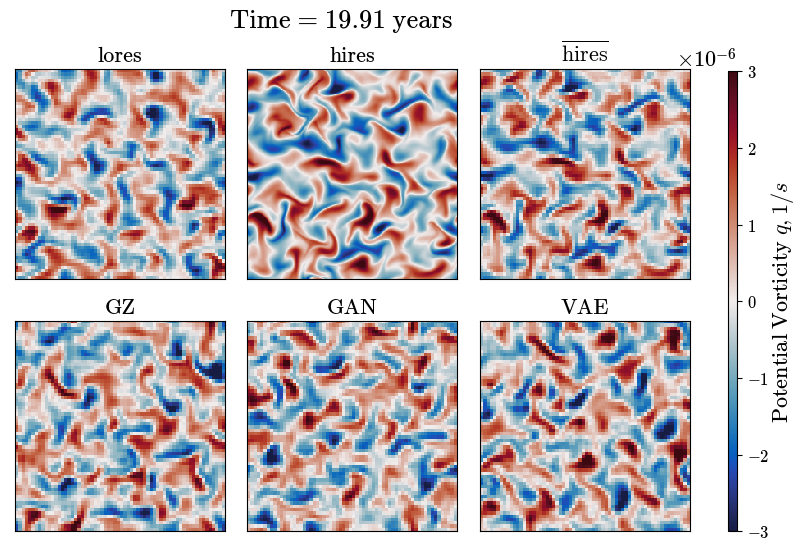

In [131]:
plot_lower_PV()

In [138]:
create_animation(plot_upper_vel, range(0,172), 'solution-animations/velocity_upper-64.gif', FPS=8)

Animation at FPS=8 will last for 21.5 seconds


In [139]:
create_animation(plot_lower_vel, range(0,172), 'solution-animations/velocity_lower-64.gif', FPS=8)

Animation at FPS=8 will last for 21.5 seconds


In [140]:
create_animation(plot_upper_PV, range(0,172), 'solution-animations/PV_upper-64.gif', FPS=8)

Animation at FPS=8 will last for 21.5 seconds


In [141]:
create_animation(plot_lower_PV, range(0,172), 'solution-animations/PV_lower-64.gif', FPS=8)

Animation at FPS=8 will last for 21.5 seconds
